### NICE BizInfo 크롤링  
- #### input : 재무데이터 내 중복 제거된 사업자등록번호
- #### output : 기업 상세정보 

    address: 주소 / industry: 산업 / ind_rank: 산업평가종합등급(하기참조) / payroll: 평균연봉 / \
    new_payroll: 올해입사자 평균연봉 / employee: 종업원수 / employment: 입사율(연간입사자) / \
    resignation: 퇴사율(연간퇴사자) / cmp_years: 업력

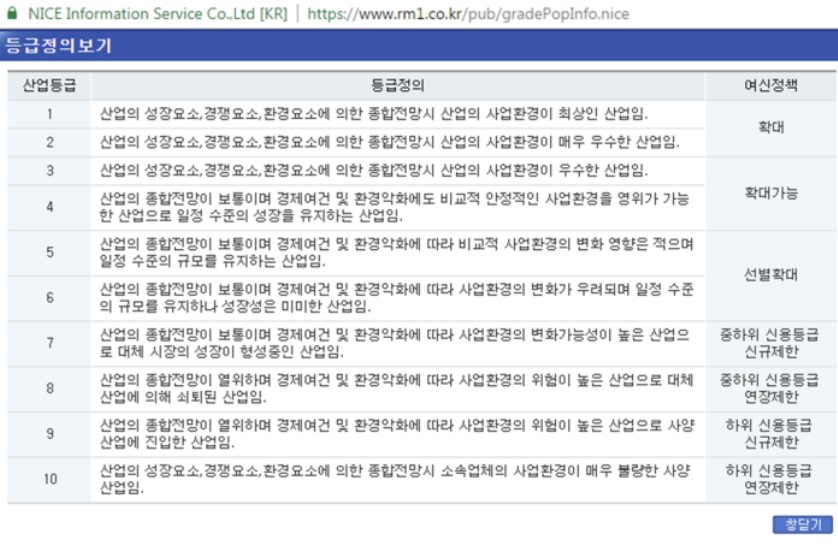

In [1]:
from IPython.display import Image  
Image('data/산업등급.jpg')

In [195]:
import pandas as pd
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time
import warnings
warnings.filterwarnings('ignore')

In [216]:
#NICE 제공 재무데이터 불러오기 및 사업자등록번호 기준 중복제거
financial_data = pd.read_csv('data/재무데이터.txt', sep = "\t", encoding = "cp949", index_col=0)
f_index = financial_data.index.unique()

In [199]:
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
driver.implicitly_wait(10)
time.sleep(0.2)
c_data = []

for i in range(len(f_index)):
    url = f'https://www.nicebizinfo.com/ep/EP0100M001GE.nice?itgSrch={str(f_index[i])}'
    driver.get(url)
    driver.implicitly_wait(10)
    time.sleep(0.2)
    try:        
        driver.find_element(By.CSS_SELECTOR,'td.no_result')
        address = industry = ind_rank = payroll = new_payroll = employee = employment = resignation = cmp_years = ''
        c_data.append([address, industry, ind_rank, payroll, new_payroll, employee, employment, resignation, cmp_years])
    except:
        try:
            driver.find_element(By.CSS_SELECTOR,'td.tar.bdr1').click()
            driver.implicitly_wait(10)
            time.sleep(0.2)
            page_source = driver.page_source 
            soup = bs(page_source, 'lxml')
            address = soup.select('div.iconBox.bg2 strong')[0].text
            industry = soup.select('div.iconBox.bg5 strong')[0].text
            try:
                rank = soup.select('div.cTable.sp2')[1]
                ind_rank = rank.select('td')[3].text.strip()        
            except:
                ind_rank = ''
            try: 
                table = soup.select('.cSection strong.fz16')
                payroll = table[0].text.strip()
                new_payroll = table[1].text.strip()
                employee = table[2].text.strip()
                employment = table[3].text.strip().replace('\n','')
                resignation = table[4].text.strip().replace('\n','')
                cmp_years = table[5].text.strip()
            except:
                payroll = new_payroll = employee = employment = resignation = cmp_years = ''    
            c_data.append([address, industry, ind_rank, payroll, new_payroll, employee, employment, resignation, cmp_years])   
        except:
            driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
            driver.implicitly_wait(10)
            time.sleep(0.2)
            driver.get(url)
            driver.implicitly_wait(10)
            time.sleep(0.2)
            address = driver.find_element(By.CSS_SELECTOR,'li.addr').text
            industry = driver.find_element(By.CSS_SELECTOR,'span.fll.textLeftBg.gear').text
            ind_rank = payroll = new_payroll = employee = employment = resignation = cmp_years = ''
            c_data.append([address, industry, ind_rank, payroll, new_payroll, employee, employment, resignation, cmp_years])
            
driver.quit()

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.29M/6.29M [00:00<00:00, 7.98MB/s]
[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.29M/6.29M [00:00<00:00, 9.14MB/s]


In [220]:
bizinfo_df = pd.DataFrame(c_data, columns=['address', 'industry', 'ind_rank', 'payroll', 'new_payroll', 'employee', 'employment', 'resignation', 'cmp_years'])
bizinfo_df.index = f_index
bizinfo_df.to_csv('bizinfo_df.csv') 

In [214]:
df = pd.read_csv('bizinfo_df.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11903 entries, 0 to 11902
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   사업자번호        11903 non-null  int64  
 1   사업자번호.1      11903 non-null  int64  
 2   사업자번호.2      11903 non-null  int64  
 3   address      11506 non-null  object 
 4   industry     11506 non-null  object 
 5   ind_rank     10148 non-null  float64
 6   payroll      9608 non-null   object 
 7   new_payroll  9608 non-null   object 
 8   employee     9608 non-null   object 
 9   employment   9608 non-null   object 
 10  resignation  9608 non-null   object 
 11  cmp_years    9608 non-null   object 
dtypes: float64(1), int64(3), object(8)
memory usage: 1.1+ MB


In [221]:
bizinfo_df.to_excel('bizinfo_df.xlsx')

In [ ]:
# with pd.ExcelWriter('sample.xlsx') as writer:
# 	df[df.a == 'A'].to_excel(writer, sheet_name='A')
# 	df[df.a == 'B'].to_excel(writer, sheet_name='B')
# 	df[df.a == 'C'].to_excel(writer, sheet_name='C')

In [69]:
# driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# c_data = []
# for i in range(len(f_index)):
#     url = f'https://www.nicebizinfo.com/ep/EP0100M001GE.nice?itgSrch={str(f_index[i])}'
#     driver.get(url)
#     try:        
#         driver.find_element(By.CSS_SELECTOR,'td.no_result')
#         address = industry = ind_rank = payroll = new_payroll = employee = employment = resignation = cmp_years = ''
#         c_data.append([address, industry, ind_rank, payroll, new_payroll, employee, employment, resignation, cmp_years])
#     except:
#         try:
#             driver.find_element(By.CSS_SELECTOR,'td.tar.bdr1').click()
#             WebDriverWait(driver, 2).until(EC.alert_is_present())
#             alert = driver.switch_to.alert           
#             alert.accept()  
#             driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
#             driver.get(url)      
#             address = driver.find_element(By.CSS_SELECTOR,'li.addr').text
#             industry = driver.find_element(By.CSS_SELECTOR,'span.fll.textLeftBg.gear').text
#             ind_rank = payroll = new_payroll = employee = employment = resignation = cmp_years = ''
#             c_data.append([address, industry, ind_rank, payroll, new_payroll, employee, employment, resignation, cmp_years])        
#         except:
#             time.sleep(2)
#             page_source = driver.page_source 
#             soup = bs(page_source, 'lxml')
#             address = soup.select('div.iconBox.bg2 strong')[0].text
#             industry = soup.select('div.iconBox.bg5 strong')[0].text
#             try:
#                 rank = soup.select('div.cTable.sp2')[1]
#                 ind_rank = rank.select('td')[3].text.strip()        
#             except:
#                 ind_rank = ''
#             try: 
#                 table = soup.select('.cSection strong.fz16')
#                 payroll = table[0].text.strip()
#                 new_payroll = table[1].text.strip()
#                 employee = table[2].text.strip()
#                 employment = table[3].text.strip().replace('\n','')
#                 resignation = table[4].text.strip().replace('\n','')
#                 cmp_years = table[5].text.strip()
#             except:
#                 payroll = new_payroll = employee = employment = resignation = cmp_years = ''    
#             c_data.append([address, industry, ind_rank, payroll, new_payroll, employee, employment, resignation, cmp_years]) 